In [1]:
import helper_eval_refactored as helper_eval
import helper_data_load as helper_load
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
predictor = "os_days"
genomics = True
num_genomics = 1000
local = True
data_norm_chum, data_norm_iucpq = helper_load.get_norm_data(local, predictor, ecog=True)


223 patients with clinical and radiation data for CHUM.
192 patients with os, radiation, ecog and pdl1 data for CHUM.
164 patients with clinical and radiation data for IUCPQ.
128 patients with os, radiation, ecog and pdl1 data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.Categorical(df[col])
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

192 patients after drop NaN - CHUM.
128 patients after drop NaN - IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')


<AxesSubplot: >

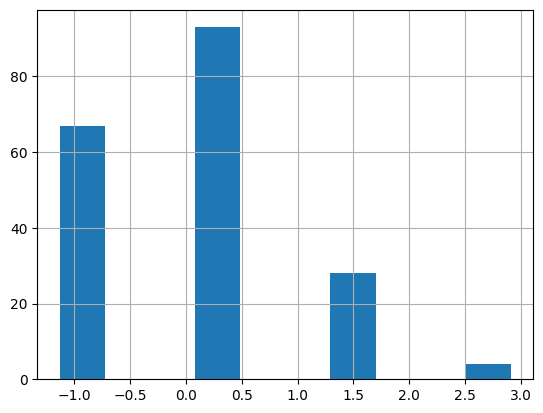

In [9]:
data_norm_chum.ecog_status.hist(color="tab:blue")

In [2]:
predictor = "os_days"
train_set = "CHUM"
genomics = True
num_genomics = 1000
local = True
data_norm_chum, data_norm_iucpq = helper_load.get_norm_data(local, predictor, genomics=genomics, num_genomics=num_genomics)
if train_set == "CHUM": 
    data_norm_train = data_norm_chum
    data_norm_test = data_norm_iucpq
    val_set = "IUCPQ"
elif train_set == "IUCPQ": 
    data_norm_train = data_norm_iucpq
    data_norm_test = data_norm_chum
    val_set = "CHUM"
feat_sel_method = "f_reg"
k_max = 100
nr_sol = -1
random_state = 42
savePath = "../../Data/test_folder"

dicovery_meth_nr_feat_dict = {SVR(kernel="linear"): 5, LinearRegression(): 6, RandomForestRegressor(n_estimators=100, random_state=random_state):7, BaggingRegressor(random_state=random_state):8,
                            GradientBoostingRegressor(random_state=random_state):9, ElasticNetCV(random_state=random_state):10,
                            "Ensemble Lin. R.":14,linear_model.LassoCV(random_state=random_state):13}
    

72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')


72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')


In [3]:
df_vali[i] = helper_eval.train_disc_n_validate(predictor, data_norm_train, data_norm_test, dicovery_meth_nr_feat_dict, feat_sel_method, nr_sol, val_set, k_max, local, savePath)


call train_final_model_test... next
Call select feats
in f_reg feat sel
in fit_and_predict with SVR(kernel='linear') (type: <class 'sklearn.svm._classes.SVR'>) and feats sel f_reg: 
x train
         ADA      SKA3    PDCD2L      DRG2  CDK5RAP3      IFNE
0  -1.138679 -0.117956 -1.423701 -1.696799 -1.232299 -0.088972
1  -1.138679 -1.099329 -1.423701 -1.696799 -2.284710 -0.999142
2   0.353625 -1.099329 -1.423701  0.126123  0.226360 -0.424889
3  -1.138679  0.629081 -1.423701  0.199290 -0.823924 -0.088972
4   1.424661  0.771771  1.260334  1.128407  1.019807  1.561704
..       ...       ...       ...       ...       ...       ...
67 -1.138679 -1.099329 -0.076044 -0.061082 -0.772313 -0.088972
68  1.508191  1.181296  1.740943  1.104951  1.221937  0.821199
69  0.636014 -0.437525 -1.423701 -0.895599  0.168211 -0.999142
70  1.399211 -1.099329  1.296965  0.815492  0.998869 -0.088972
71  0.321284  0.689531  1.179153  1.353021  0.770979  0.723619

[72 rows x 6 columns]
x test
         ADA      SKA3  

/Users/iucpq/Documents/IUCPQ/Environments/venv1/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/iucpq/Documents/IUCPQ/Environments/venv1/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/iucpq/Documents/IUCPQ/Environments/venv1/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

KeyboardInterrupt: 

In [9]:
import helper_data_load

In [11]:
local = True
predictor = "os_days"

In [13]:
data_norm_chum, data_norm_iucpq = helper_data_load.get_norm_data(local, predictor, genomics=True, num_genomics=1000)


72 patients with clinical and genomics (1000) data for CHUM.
72 patients with clinical and genomics (5000) data for CHUM.
59 patients with clinical and genomics data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/Environments/venv1/lib/python3.9/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/iucpq/Documents/IUCPQ/Environments/venv1/lib/python3.9/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/iucpq/Documents/IUCPQ/Environments/venv1/lib/python3.9/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


72 patients after drop NaN - CHUM.
59 patients after drop NaN - IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')


In [40]:
len(data_norm_iucpq.columns[data_norm_iucpq.isna().any()].tolist())#.any()
#data_norm_iucpq#[data_norm_iucpq.isna()]

186

In [31]:
print(len(data_norm_iucpq.columns))

19641


In [35]:
len(data_norm_iucpq)

59

In [38]:
print(len(data_norm_iucpq.dropna(axis=1).columns))

19455


In [34]:
data_norm_iucpq.isna()

,index,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,os_days
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
data_norm_iucpq.isnull().sum().to_dict()

{'index': 0,
 'A1BG': 0,
 'A1CF': 0,
 'A2M': 0,
 'A2ML1': 0,
 'A3GALT2': 0,
 'A4GALT': 0,
 'A4GNT': 0,
 'AAAS': 0,
 'AACS': 0,
 'AADAC': 0,
 'AADACL2': 0,
 'AADACL3': 0,
 'AADACL4': 0,
 'AADAT': 0,
 'AAGAB': 0,
 'AAK1': 0,
 'AAMDC': 0,
 'AAMP': 0,
 'AANAT': 0,
 'AAR2': 0,
 'AARD': 0,
 'AARS1': 0,
 'AARS2': 0,
 'AARSD1': 0,
 'AASDH': 0,
 'AASDHPPT': 0,
 'AASS': 0,
 'AATF': 0,
 'AATK': 0,
 'ABAT': 0,
 'ABCA1': 0,
 'ABCA10': 0,
 'ABCA12': 0,
 'ABCA13': 0,
 'ABCA2': 0,
 'ABCA3': 0,
 'ABCA4': 0,
 'ABCA5': 0,
 'ABCA6': 0,
 'ABCA7': 0,
 'ABCA8': 0,
 'ABCA9': 0,
 'ABCB1': 0,
 'ABCB10': 0,
 'ABCB11': 0,
 'ABCB4': 0,
 'ABCB5': 0,
 'ABCB6': 0,
 'ABCB7': 0,
 'ABCB8': 0,
 'ABCB9': 0,
 'ABCC1': 0,
 'ABCC10': 0,
 'ABCC11': 0,
 'ABCC12': 0,
 'ABCC2': 0,
 'ABCC3': 0,
 'ABCC4': 0,
 'ABCC5': 0,
 'ABCC6': 0,
 'ABCC8': 0,
 'ABCC9': 0,
 'ABCD1': 0,
 'ABCD2': 0,
 'ABCD3': 0,
 'ABCD4': 0,
 'ABCE1': 0,
 'ABCF1': 0,
 'ABCF2': 0,
 'ABCF2-H2BE1': 0,
 'ABCF3': 0,
 'ABCG1': 0,
 'ABCG2': 0,
 'ABCG4': 0,
 'ABCG5': 0,

In [11]:
import os
# creat folders for saving results
BASE = "../../Data/Results/"

#folder_bases = ["os_1000gen", "os_5000gen", "pdl1_1000gen", "pdl1_5000gen", "pfs_1000gen", "pfs_5000gen"]
folder_bases = ["os_Immunegen", "pdl1_Immunegen", "pfs_Immunegen"]
end_folders = ["/eval/c_idxs/", "/eval/preds/", "/results/preds/"]
for folder in folder_bases:
    for end_folder in end_folders:
        path = BASE + folder + end_folder
        if not os.path.exists(path):
            os.makedirs(path)
    


In [3]:
from pathlib import Path

# Directories
BASE_DIR = Path(__file__).parent.parent.absolute()

NameError: name '__file__' is not defined

In [8]:
import os
print(os.getcwdb())
print(os.path.abspath(''))
print(os.path.dirname(''))
print(os.path.join(os.path.dirname(''), '..'))
print(os.path.dirname(os.path.realpath('')))
print(os.path.abspath(os.path.dirname('')))

b'/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions'
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions

..
/Users/iucpq/Documents/IUCPQ/IUCPQ
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions


In [1]:
__file__

NameError: name '__file__' is not defined

In [8]:
import numpy as np

In [10]:
feat_sel_meth = "mrmr"
for i in range(1,51):
    print(i)
    if (feat_sel_meth == "mrmr") and (i == 6):
        break

1
2
3
4
5
6


In [11]:
[int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

[200, 650, 1100, 1550, 2000]

In [14]:
liste = [int(x) for x in np.linspace(10, 110, num = 6)]

TypeError: float() argument must be a string or a number, not 'list'

In [6]:
from lifelines.utils import concordance_index


In [29]:
liste_true = [6.9, 0.1, 0.2]
liste_pred = [0.5, 0.2, 0.4]

liste_true1 = [0.5, 0.3, 0.5]
liste_pred1 = [0.5, 0.2, 0.4]

# Variante 1:
var_c1a = concordance_index(liste_true, liste_pred)
var_c1b = concordance_index(liste_true1, liste_pred1)
print(var_c1a)
print(var_c1b)
print("Variante1: ", np.mean([var_c1a, var_c1b]))

# Variante 2:
for i in liste_true1:
    liste_true.append(i)
for i in liste_pred1:
    liste_pred.append(i)

print(liste_true)
print("Variante2: ", concordance_index(liste_true, liste_pred))


1.0
1.0
Variante1:  1.0
[6.9, 0.1, 0.2, 0.5, 0.3, 0.5]
Variante2:  0.8214285714285714


In [18]:
[j for sub in liste for j in sub]

[0.4, 0.1, 0.2]

In [11]:
liste_true = [6.9, 10.1, 10.2]
liste_pred = [1.5, 1.2, 2.4]

liste_true1 = [0.6, 0.3, 0.5]
liste_pred1 = [0.5, 0.2, 0.4]

# Variante 1:
var_c1a = concordance_index(liste_true, liste_pred)
var_c1b = concordance_index(liste_true1, liste_pred1)
print(var_c1a)
print(var_c1b)
print("Variante1: ", np.mean([var_c1a, var_c1b]))

# Variante 2:
for i in liste_true1:
    liste_true.append(i)
for i in liste_pred1:
    liste_pred.append(i)

print(liste_true)
print("Variante2: ", concordance_index(liste_true, liste_pred))

0.6666666666666666
1.0
Variante1:  0.8333333333333333
[6.9, 10.1, 10.2, 0.6, 0.3, 0.5]
Variante2:  0.9333333333333333


In [1]:
import helper_data_load as helper_load
import os
import helper_prediction_class as helper
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd


In [2]:
feat_sel_method = "f_classif"
nr_sol_temp = "-1"

In [3]:
data_norm_chum, data_norm_iucpq = helper_load.get_norm_data(local=True, classification=True)
random_state=42
nr_sol = -1


# Multiple Linear Regression
df_result_multi_lr = pd.DataFrame(columns=["nr_feat","c_idx_multi"])
lr_model = LogisticRegressionCV(random_state=random_state)
df_result_multi_lr = helper.not_ensemble_methods(lr_model, df_result_multi_lr, data_norm_iucpq, random_state=random_state, feat_sel_meth=feat_sel_method, nr_sol=nr_sol)
print("Trained Multilinear")
os.system("echo Trained Multilinear")

#result_discovery_IUCPQ_all = helper.all_methods(data_norm_iucpq, random_state, FEAT_SEL_METH=feat_sel_method, NR_SOL=nr_sol)



223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

149 patients with clinical and radiation data for CHUM and classification.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.class_os_days != 2] = 1
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.class_os_days == "nan"] = np.nan


108 patients with clinical and radiation data for IUCPQ and classification.
in kFold_training:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
in select_feat:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
in fit_and_predict:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
LogisticRegressionCV(random_state=42)
in fit_right before error:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
86
in select_feat:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
in fit_and_predict:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
LogisticRegressionCV(random_state=42)
in fit_right before error:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
86
in select_feat:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
in fit_and_predict:  <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
LogisticRegressionCV(random_state=42)
in fit_right before error:  <class 'sklearn.linear_model

KeyboardInterrupt: 

In [5]:
df_result_multi_lr

,nr_feat,c_idx_multi


In [4]:
data_norm_iucpq.class_os_days

0      1
1      1
2      1
3      1
4      1
      ..
103    2
104    1
105    1
106    1
107    1
Name: class_os_days, Length: 108, dtype: int64